# Dataset Link: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews

TO CLASSIFY THE FEEDBACK GIVEN BY USERS ON ALEXA USING MACHINE LEARNING MODEL,AND GET THE BEST ACCURACY SCORE.

In [1]:
import pandas as pd
df = pd.read_csv("amazon_alexa.tsv",sep="\t")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.nunique()

rating                 5
date                  77
variation             16
verified_reviews    2301
feedback               2
dtype: int64

# Check rating distribution

In [5]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [6]:
df.loc[df['rating'] == 5, 'verified_reviews'].head()

0                                        Love my Echo!
1                                            Loved it!
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
5    I received the echo as a gift. I needed anothe...
Name: verified_reviews, dtype: object

In [7]:
df.loc[df['rating'] == 4, 'verified_reviews'].head()

2     Sometimes while playing a game, you can answer...
19    I liked the original Echo. This is the same bu...
22    Have only had it set up for a few days. Still ...
28    Fun item to play with and get used to using.  ...
31                                            I like it
Name: verified_reviews, dtype: object

In [8]:
df.loc[df['rating'] == 3, 'verified_reviews'].head()

6     Without having a cellphone, I cannot use many ...
24    I got a second unit for the bedroom, I was exp...
33    The speakers sound pretty good for being so sm...
49    No different than Apple. To play a specific li...
54                                   like google better
Name: verified_reviews, dtype: object

In [9]:
df.loc[df['rating'] == 2, 'verified_reviews'].head()

46     It's like Siri, in fact, Siri answers more acc...
111    Sound is terrible if u want good music too get...
176                                 Sad joke. Worthless.
187    Really disappointed Alexa has to be plug-in to...
205    It's got great sound and bass but it doesn't w...
Name: verified_reviews, dtype: object

In [10]:
df.loc[df['rating'] == 1, 'verified_reviews'].head()

141                                   Not much features.
162    Stopped working after 2 weeks ,didn't follow c...
341                               Alexa hardly came on..
350    Item no longer works after just 5 months of us...
361    This thing barely works. You have to select 3r...
Name: verified_reviews, dtype: object

# Check Feedback distribution

In [11]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [12]:
df.loc[df['feedback'] == 1, 'verified_reviews'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [13]:
df.loc[df['feedback'] == 0, 'verified_reviews'].head()

46     It's like Siri, in fact, Siri answers more acc...
111    Sound is terrible if u want good music too get...
141                                   Not much features.
162    Stopped working after 2 weeks ,didn't follow c...
176                                 Sad joke. Worthless.
Name: verified_reviews, dtype: object

# Select feedback as target column

# Add few more relevant features other than text

In [14]:
# length of the text
df['length'] = df['verified_reviews'].str.len()

In [15]:
df.loc[df['feedback'] == 0,'length'].describe()

count     257.000000
mean      215.241245
std       236.325955
min         1.000000
25%        53.000000
50%       137.000000
75%       289.000000
max      1686.000000
Name: length, dtype: float64

In [16]:
df.loc[df['feedback'] == 1,'length'].describe()

count    2893.000000
mean      124.659177
std       174.624491
min         1.000000
25%        29.000000
50%        69.000000
75%       154.000000
max      2851.000000
Name: length, dtype: float64

In [17]:
df['no_of_words'] = df['verified_reviews'].apply(lambda s: len(s.split()))

In [18]:
df.loc[df['feedback'] == 0,'no_of_words'].describe()

count    257.000000
mean      40.256809
std       43.983087
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      307.000000
Name: no_of_words, dtype: float64

In [19]:
df.loc[df['feedback'] == 1,'no_of_words'].describe()

count    2893.000000
mean       23.963705
std        33.309237
min         0.000000
25%         5.000000
50%        13.000000
75%        30.000000
max       526.000000
Name: no_of_words, dtype: float64

#### Try violin plot of feedback vs no_of_words   and feedback vs length

<AxesSubplot:xlabel='feedback', ylabel='no_of_words'>

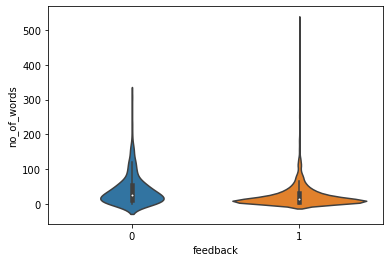

In [20]:
import seaborn as sb
sb.violinplot(x='feedback',y='no_of_words',data=df)

<AxesSubplot:>

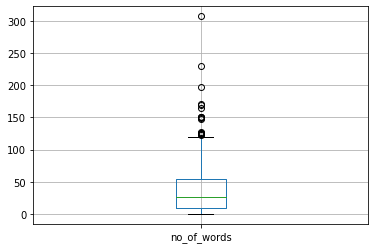

In [21]:
df.loc[df['feedback'] == 0,['no_of_words']].boxplot()

<AxesSubplot:>

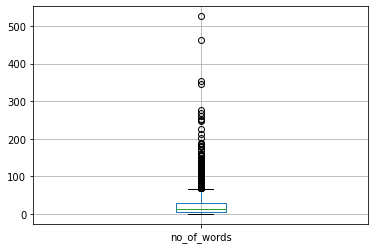

In [22]:
df.loc[df['feedback'] == 1,['no_of_words']].boxplot()

# Split X & Y

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
 5   length            3150 non-null   int64 
 6   no_of_words       3150 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 172.4+ KB


In [24]:
X = df.loc[:,['verified_reviews', 'length','no_of_words']]
Y = df.loc[:,['feedback']]

In [25]:
X.shape,Y.shape

((3150, 3), (3150, 1))

# Split Train test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1 , random_state=7, stratify=Y)

In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2835, 3), (315, 3), (2835, 1), (315, 1))

In [28]:
Y_train['feedback'].value_counts(normalize=True)

1    0.918519
0    0.081481
Name: feedback, dtype: float64

In [29]:
Y_test['feedback'].value_counts(normalize=True)

1    0.91746
0    0.08254
Name: feedback, dtype: float64

# Do undersampling to balance the data

In [30]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler( random_state=7) 
#sampling_strategy option here--> use it to take more samples from positive feedback class
X_train_un, Y_train_un = rus.fit_resample(X_train, Y_train)

In [31]:
X_train_un.shape, Y_train_un.shape

((462, 3), (462, 1))

In [32]:
Y_train_un.value_counts()

feedback
0           231
1           231
dtype: int64

# Do data cleaning of 'verified reviews' using Spacy

In [33]:
def cleaning_step(all_text):
  """Clean the text after tokenization from spacy"""
  clean_text = []
  for line in all_text:
    clean_line = []
    for token in line:
      if token.is_stop == True:
        pass
      elif token.like_num == True:
        clean_line.append('num')
      elif token.like_email == True:
        clean_line.append('email')
      elif token.like_url == True:
        clean_line.append('url')
      elif token.__len__() <=2:
        pass
      elif (token.is_punct == True) or (token.is_quote == True):
        pass
      else:
        clean_line.append(token.lemma_.lower())
    clean_line = " ".join(clean_line)
    clean_text.append(clean_line)
  return clean_text

In [34]:
def text_cleaning_spacy(df_text,spacy_model=None,training=True):
  if(training==True):
    import spacy
    spacy_model = spacy.load('en_core_web_sm')

  all_text = df_text.apply(spacy_model)
  clean_text = cleaning_step(all_text)
  return clean_text, spacy_model

In [35]:
clean_text, spacy_model = text_cleaning_spacy(X_train_un['verified_reviews'],training=True)

In [36]:
X_train_un['clean_text'] = clean_text

In [37]:
X_train_un['clean_text'].head()

0    fine spot exact massive failing order turn rep...
1    device interact home fill apple device disappo...
2    recommend load netflix rare occasion run progr...
3    initially echo dot work time dot stop respond ...
4    work num month stop connect internet wifi trou...
Name: clean_text, dtype: object

In [38]:
clean_text, spacy_model = text_cleaning_spacy(X_test['verified_reviews'],spacy_model,training=False)

In [39]:
X_test['clean_text'] = clean_text

In [40]:
X_test['clean_text'].head()

1429    love thing good toy buy awhile far smart plug ...
246                                      echo great small
2034                                   exchange new color
2007    absolutely love thing well rechargeable play m...
1965                                       love echo plus
Name: clean_text, dtype: object

# Apply TF-IDF and generate the matrix

In [41]:
def apply_tfidf(clean_text,training = True,tfidf_model = None):
  from sklearn.feature_extraction.text import TfidfVectorizer
  if training == True:
    TfidfVec = TfidfVectorizer(stop_words='english')
    TfidfVec.fit(clean_text)
    tfidf_model = TfidfVec
    tfidf_data = tfidf_model.transform(clean_text)
    print("Vocalibulary length ", len(TfidfVec.vocabulary_))
  elif tfidf_model != None:
    tfidf_data = tfidf_model.transform(clean_text)
  else:
    print("Either training should be true or tfidf model should be provided!")
  return tfidf_data, tfidf_model

In [42]:
tf_idf_train, tfidf_model = apply_tfidf(X_train_un['clean_text'],training = True)

Vocalibulary length  1285


In [43]:
tf_idf_test, tfidf_model = apply_tfidf(X_test['clean_text'],training = False, tfidf_model = tfidf_model)

In [44]:
tf_idf_train.shape, tf_idf_test.shape

((462, 1285), (315, 1285))

# Applying classifiers on this data

# MultinomialNB

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
multinomial=MultinomialNB()
multinomial.fit(tf_idf_train,Y_train_un)
Y_pred = multinomial.predict(tf_idf_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.30      0.92      0.45        26
           1       0.99      0.81      0.89       289

    accuracy                           0.82       315
   macro avg       0.65      0.86      0.67       315
weighted avg       0.93      0.82      0.85       315

0.8158730158730159


C:\Users\moizk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=7)
rf.fit(tf_idf_train,Y_train_un)
Y_pred = rf.predict(tf_idf_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

C:\Users\moizk\AppData\Local\Temp/ipykernel_10604/3226135927.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(tf_idf_train,Y_train_un)


              precision    recall  f1-score   support

           0       0.25      0.92      0.40        26
           1       0.99      0.75      0.86       289

    accuracy                           0.77       315
   macro avg       0.62      0.84      0.63       315
weighted avg       0.93      0.77      0.82       315

0.7682539682539683


# BaggingClassifier(base_estimator=SVC)

In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier(base_estimator=SVC())
bgc.fit(tf_idf_train,Y_train_un)
Y_pred = bgc.predict(tf_idf_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.25      0.96      0.39        26
           1       1.00      0.74      0.85       289

    accuracy                           0.76       315
   macro avg       0.62      0.85      0.62       315
weighted avg       0.93      0.76      0.81       315

0.7555555555555555


C:\Users\moizk\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(tf_idf_train,Y_train_un)
Y_pred = logistic.predict(tf_idf_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.24      0.92      0.38        26
           1       0.99      0.73      0.84       289

    accuracy                           0.75       315
   macro avg       0.61      0.83      0.61       315
weighted avg       0.93      0.75      0.80       315

0.746031746031746


C:\Users\moizk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# AdaBoostClassifier

In [50]:
from sklearn.ensemble import AdaBoostClassifier
adam=AdaBoostClassifier()
adam.fit(tf_idf_train,Y_train_un)
Y_pred = adam.predict(tf_idf_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.20      0.85      0.33        26
           1       0.98      0.70      0.82       289

    accuracy                           0.71       315
   macro avg       0.59      0.77      0.57       315
weighted avg       0.92      0.71      0.78       315

0.7142857142857143


C:\Users\moizk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# XGBClassifier

In [51]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(tf_idf_train,Y_train_un)
Y_pred = xgb.predict(tf_idf_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.21      0.92      0.34        26
           1       0.99      0.69      0.81       289

    accuracy                           0.70       315
   macro avg       0.60      0.80      0.58       315
weighted avg       0.93      0.70      0.77       315

0.7047619047619048


# DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(tf_idf_train,Y_train_un)
Y_pred = tree.predict(tf_idf_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.20      0.85      0.32        26
           1       0.98      0.69      0.81       289

    accuracy                           0.70       315
   macro avg       0.59      0.77      0.56       315
weighted avg       0.92      0.70      0.77       315

0.7015873015873015
